In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fadf6125de4a9b6c81535d673451c2b5


In [4]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [5]:

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | bereznik
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | dudinka
Processing Record 10 of Set 1 | chulman
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | macaboboni
City not found. Skipping...
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | ternate
Processing Record 20 of Set 1 | ucluelet
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | autazes
Processing Record 23 of Set 1 | rungata
City not found. Skipping...

Processing Record 43 of Set 4 | alta floresta
Processing Record 44 of Set 4 | senanga
Processing Record 45 of Set 4 | necochea
Processing Record 46 of Set 4 | petrivka
Processing Record 47 of Set 4 | dunedin
Processing Record 48 of Set 4 | katsuura
Processing Record 49 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 50 of Set 4 | northam
Processing Record 1 of Set 5 | yamachiche
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | havelock
Processing Record 4 of Set 5 | newport
Processing Record 5 of Set 5 | magistralnyy
Processing Record 6 of Set 5 | nome
Processing Record 7 of Set 5 | trairi
Processing Record 8 of Set 5 | husavik
Processing Record 9 of Set 5 | bowen
Processing Record 10 of Set 5 | khandyga
Processing Record 11 of Set 5 | vejalpur
Processing Record 12 of Set 5 | lerwick
Processing Record 13 of Set 5 | morondava
Processing Record 14 of Set 5 | ende
Processing Record 15 of Set 5 | olinda
Processing Rec

Processing Record 31 of Set 8 | skovde
City not found. Skipping...
Processing Record 32 of Set 8 | yarada
Processing Record 33 of Set 8 | ribeira grande
Processing Record 34 of Set 8 | arauca
Processing Record 35 of Set 8 | port keats
Processing Record 36 of Set 8 | poole
Processing Record 37 of Set 8 | torbay
Processing Record 38 of Set 8 | hithadhoo
Processing Record 39 of Set 8 | mehran
Processing Record 40 of Set 8 | tahe
Processing Record 41 of Set 8 | calca
Processing Record 42 of Set 8 | rorvik
Processing Record 43 of Set 8 | knysna
Processing Record 44 of Set 8 | srednekolymsk
Processing Record 45 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 46 of Set 8 | kalianget
Processing Record 47 of Set 8 | sawakin
Processing Record 48 of Set 8 | high level
Processing Record 49 of Set 8 | saint-francois
Processing Record 50 of Set 8 | kibre mengist
Processing Record 1 of Set 9 | zyryanka
Processing Record 2 of Set 9 | santa fe
Processing Record 3 of Set 9 | suzu
City

Processing Record 17 of Set 12 | talnakh
Processing Record 18 of Set 12 | cantaura
Processing Record 19 of Set 12 | tena
Processing Record 20 of Set 12 | zunyi
Processing Record 21 of Set 12 | abilene
Processing Record 22 of Set 12 | kupang
Processing Record 23 of Set 12 | america dourada
Processing Record 24 of Set 12 | vostok
Processing Record 25 of Set 12 | namibe
Processing Record 26 of Set 12 | tacna
Processing Record 27 of Set 12 | bargal
City not found. Skipping...
Processing Record 28 of Set 12 | calama
Processing Record 29 of Set 12 | taunggyi
Processing Record 30 of Set 12 | codrington
Processing Record 31 of Set 12 | ust-tsilma
Processing Record 32 of Set 12 | finote selam
Processing Record 33 of Set 12 | tanete
Processing Record 34 of Set 12 | uvarovo
Processing Record 35 of Set 12 | new york
Processing Record 36 of Set 12 | longyearbyen
Processing Record 37 of Set 12 | brejo santo
Processing Record 38 of Set 12 | hvide sande
Processing Record 39 of Set 12 | andenes
Process

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,79.45,68,100,4.99,PF,2023-02-14 02:33:14
1,Saint-Philippe,-21.3585,55.7679,74.79,89,47,12.10,RE,2023-02-14 02:33:15
2,Jamestown,42.0970,-79.2353,35.24,83,0,11.50,US,2023-02-14 02:32:50
3,Yellowknife,62.4560,-114.3525,-15.45,76,75,9.22,CA,2023-02-14 02:33:16
4,Busselton,-33.6500,115.3333,75.72,46,0,14.03,AU,2023-02-14 02:33:16
5,Lebu,-37.6167,-73.6500,56.93,88,83,5.77,CL,2023-02-14 02:33:17
6,Bereznik,62.8551,42.7072,23.22,98,100,3.24,RU,2023-02-14 02:33:17
7,Albany,42.6001,-73.9662,43.57,56,100,1.01,US,2023-02-14 02:33:17
8,Dudinka,69.4058,86.1778,7.63,94,100,19.53,RU,2023-02-14 02:33:18
9,Chulman,56.8479,124.9104,-20.79,92,84,1.30,RU,2023-02-14 02:33:18


In [19]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]



In [20]:
city_data_df[new_column_order]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2023-02-14 02:33:14,-23.1203,-134.9692,79.45,68,100,4.99
1,Saint-Philippe,RE,2023-02-14 02:33:15,-21.3585,55.7679,74.79,89,47,12.10
2,Jamestown,US,2023-02-14 02:32:50,42.0970,-79.2353,35.24,83,0,11.50
3,Yellowknife,CA,2023-02-14 02:33:16,62.4560,-114.3525,-15.45,76,75,9.22
4,Busselton,AU,2023-02-14 02:33:16,-33.6500,115.3333,75.72,46,0,14.03
...,...,...,...,...,...,...,...,...,...
571,Adeje,ES,2023-02-14 02:49:02,28.1227,-16.7260,61.02,66,20,5.75
572,Puerto Madryn,AR,2023-02-14 02:49:03,-42.7692,-65.0385,60.08,32,63,32.23
573,Neyshabur,IR,2023-02-14 02:47:15,36.2133,58.7958,36.63,86,99,2.08
574,Syedove,UA,2023-02-14 02:49:03,47.0768,38.1560,30.22,94,100,19.33


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


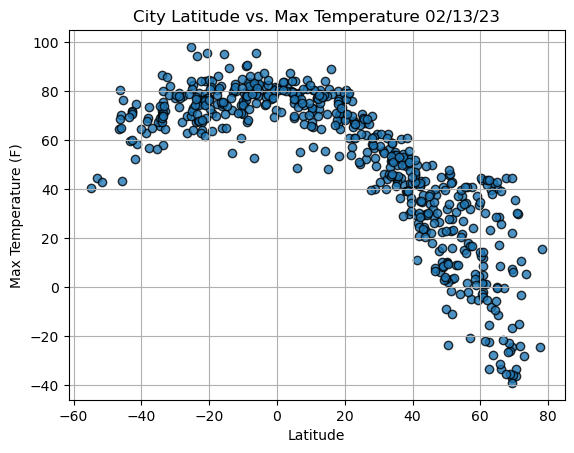

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

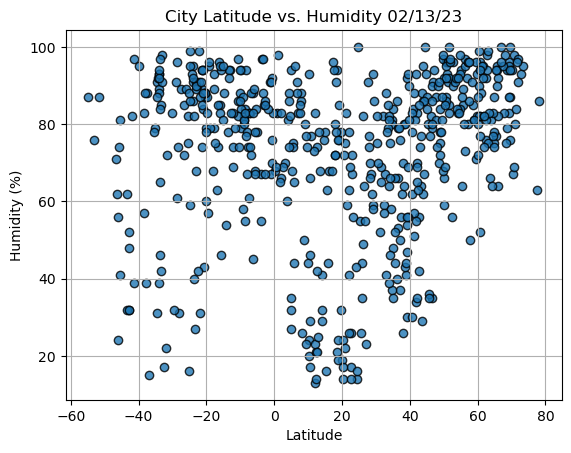

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

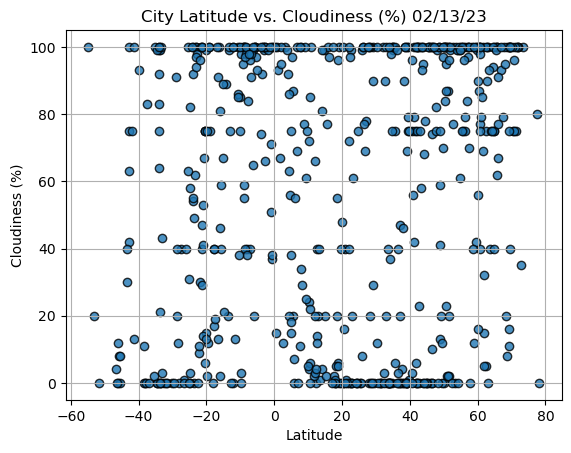

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

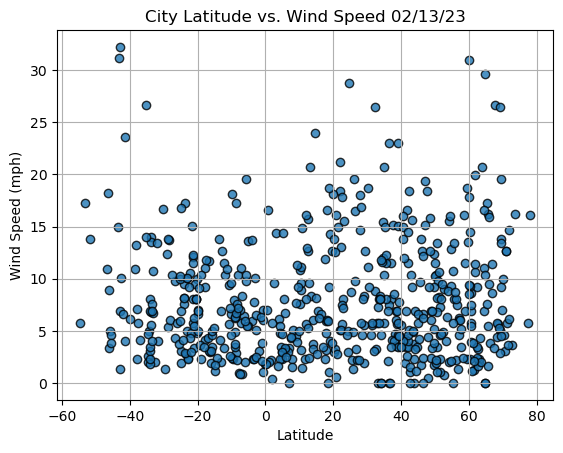

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
index13 = city_data_df.loc[13]

In [34]:
index13

City                      Ushuaia
Lat                         -54.8
Lng                         -68.3
Max Temp                    40.66
Humidity                       87
Cloudiness                    100
Wind Speed                   5.75
Country                        AR
Date          2023-02-14 02:32:09
Name: 13, dtype: object

In [35]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
571     True
572    False
573     True
574     True
575    False
Name: Lat, Length: 576, dtype: bool

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Jamestown,42.0970,-79.2353,35.24,83,0,11.50,US,2023-02-14 02:32:50
3,Yellowknife,62.4560,-114.3525,-15.45,76,75,9.22,CA,2023-02-14 02:33:16
6,Bereznik,62.8551,42.7072,23.22,98,100,3.24,RU,2023-02-14 02:33:17
7,Albany,42.6001,-73.9662,43.57,56,100,1.01,US,2023-02-14 02:33:17
8,Dudinka,69.4058,86.1778,7.63,94,100,19.53,RU,2023-02-14 02:33:18
...,...,...,...,...,...,...,...,...,...
566,Bata,1.8639,9.7658,80.53,83,95,5.73,GQ,2023-02-14 02:49:00
568,Paamiut,61.9940,-49.6678,-5.08,82,5,11.36,GL,2023-02-14 02:49:01
571,Adeje,28.1227,-16.7260,61.02,66,20,5.75,ES,2023-02-14 02:49:02
573,Neyshabur,36.2133,58.7958,36.63,86,99,2.08,IR,2023-02-14 02:47:15


In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Jamestown,42.0970,-79.2353,35.24,83,0,11.50,US,2023-02-14 02:32:50
3,Yellowknife,62.4560,-114.3525,-15.45,76,75,9.22,CA,2023-02-14 02:33:16
6,Bereznik,62.8551,42.7072,23.22,98,100,3.24,RU,2023-02-14 02:33:17
7,Albany,42.6001,-73.9662,43.57,56,100,1.01,US,2023-02-14 02:33:17
8,Dudinka,69.4058,86.1778,7.63,94,100,19.53,RU,2023-02-14 02:33:18


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

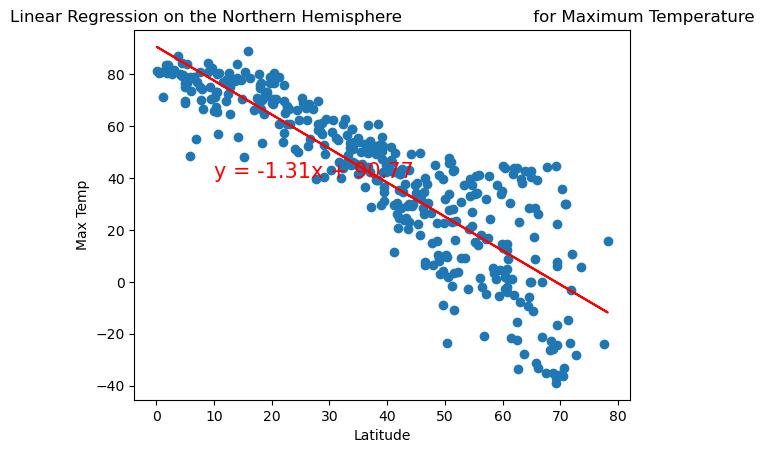

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


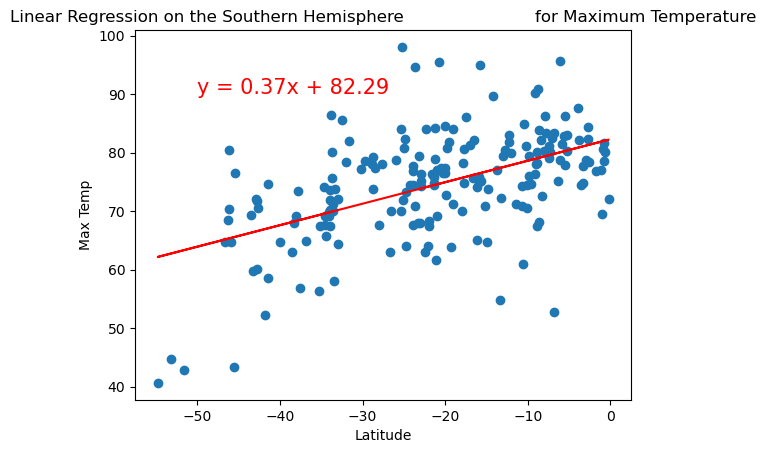

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


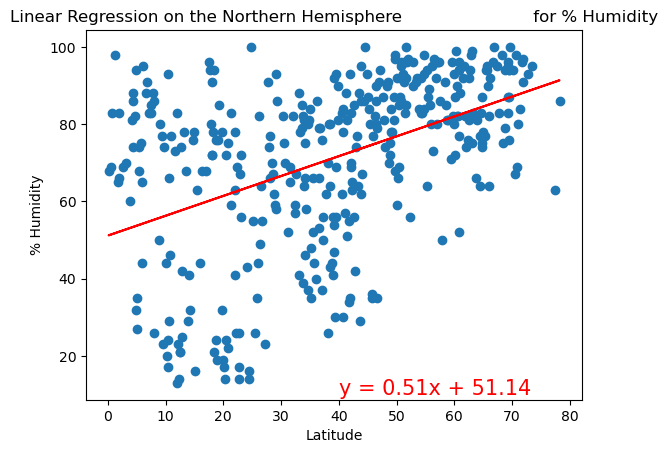

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

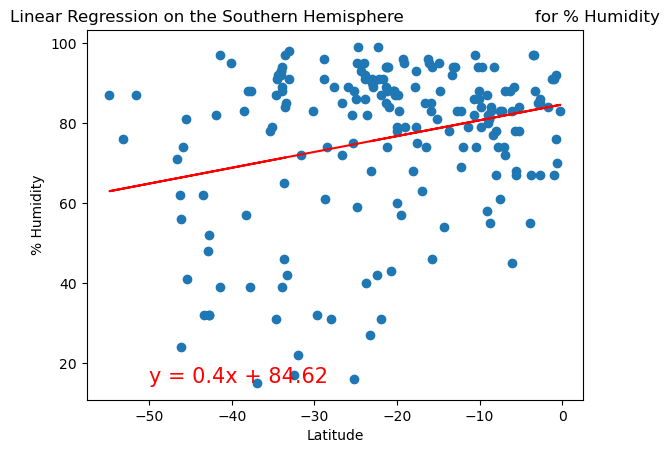

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


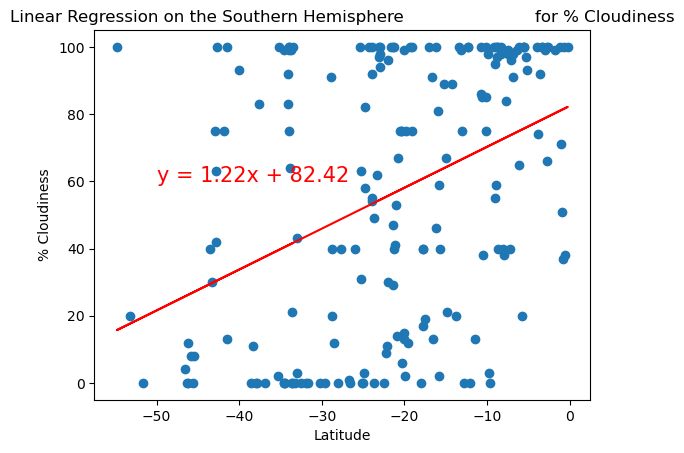

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

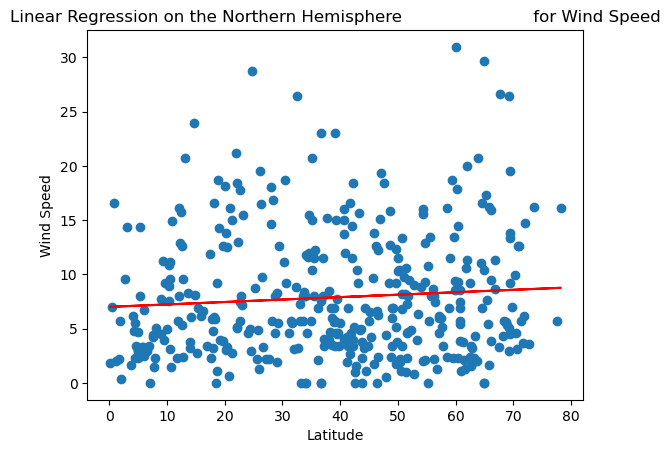

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

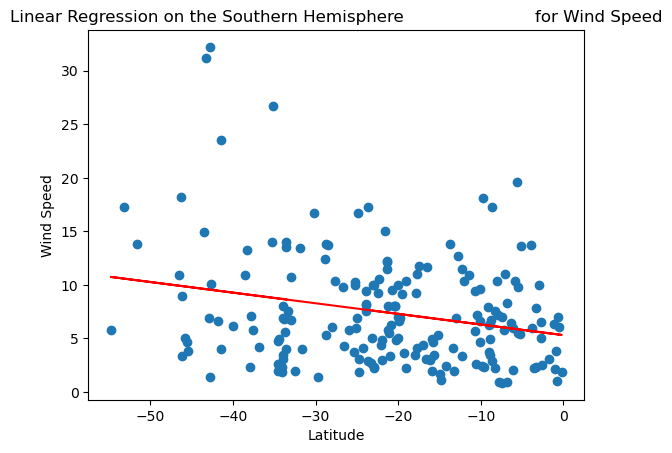

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [47]:
# Geoapify API Key
geoapify_key = "6218f3b10e6b4e30869dcf73a31f08a1"